## Import Libraries

In [178]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pickle
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

plt.style.use("fivethirtyeight")

In [150]:
df = pd.read_csv('data/telecom_churn_data.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [152]:
for col in df.columns:
    if col not in ['tenure','MonthlyCharges','TotalCharges']:
        print("Column: ",col, df[col].unique())
        print("-----------------------------------------------------------")
    

Column:  customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
-----------------------------------------------------------
Column:  gender ['Female' 'Male']
-----------------------------------------------------------
Column:  SeniorCitizen [0 1]
-----------------------------------------------------------
Column:  Partner ['Yes' 'No']
-----------------------------------------------------------
Column:  Dependents ['No' 'Yes']
-----------------------------------------------------------
Column:  PhoneService ['No' 'Yes']
-----------------------------------------------------------
Column:  MultipleLines ['No phone service' 'No' 'Yes']
-----------------------------------------------------------
Column:  InternetService ['DSL' 'Fiber optic' 'No']
-----------------------------------------------------------
Column:  OnlineSecurity ['No' 'Yes' 'No internet service']
-----------------------------------------------------------
Column:  OnlineBackup ['Yes'

In [153]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [154]:
df.drop(columns=['customerID'],inplace=True)
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [155]:
df['TotalCharges'] = df['TotalCharges'].replace({" "},"0.0").astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [156]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [157]:
def dist_plot(df,colm):
    plt.figure(figsize=(14,5))
    plt.subplot(1,2,1)
    sns.histplot(df,x = df[colm],kde=True,hue=df['gender'],legend=False,palette='cubehelix')
    plt.title(f"Distribution of {colm}, Separated for the Genders",fontsize=12)

    mean_ = df[colm].mean()
    median_ = df[colm].median()
    plt.axvline(mean_, color="purple",linestyle="--",label="Mean Value")
    plt.axvline(median_, color="orange",linestyle="--",label="Mean Value")
    plt.legend(fontsize=8)

    plt.subplot(1,2,2)
    sns.violinplot(df, y = df[colm],hue=df['gender'],palette='cubehelix')
    plt.title(f"Violin plot of {colm}",fontsize=12)

    plt.tight_layout()
    plt.show()

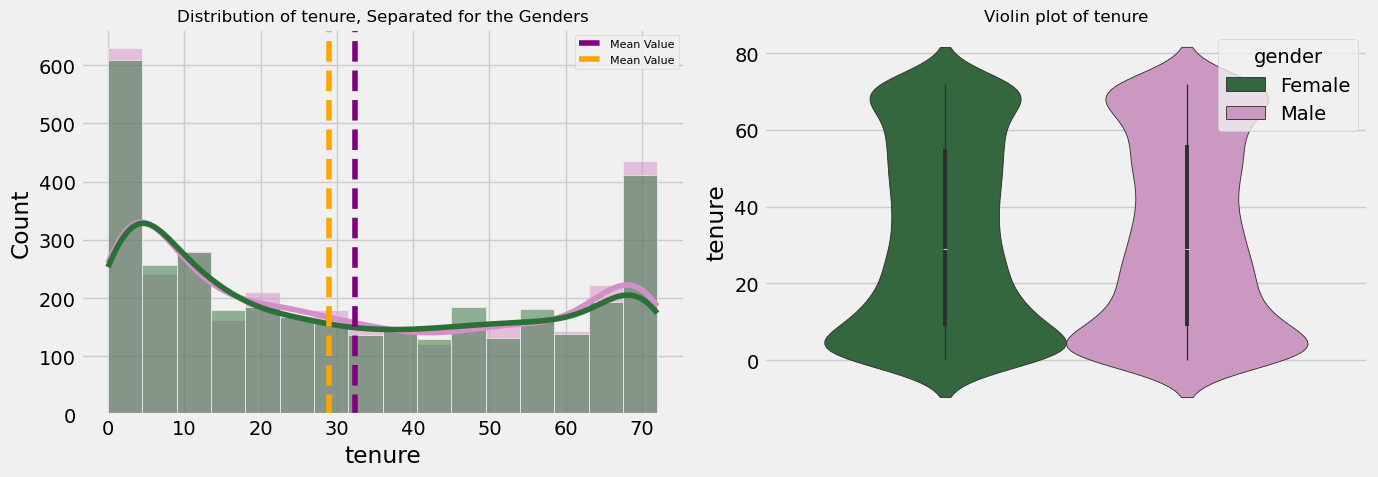

In [158]:
dist_plot(df, "tenure") 

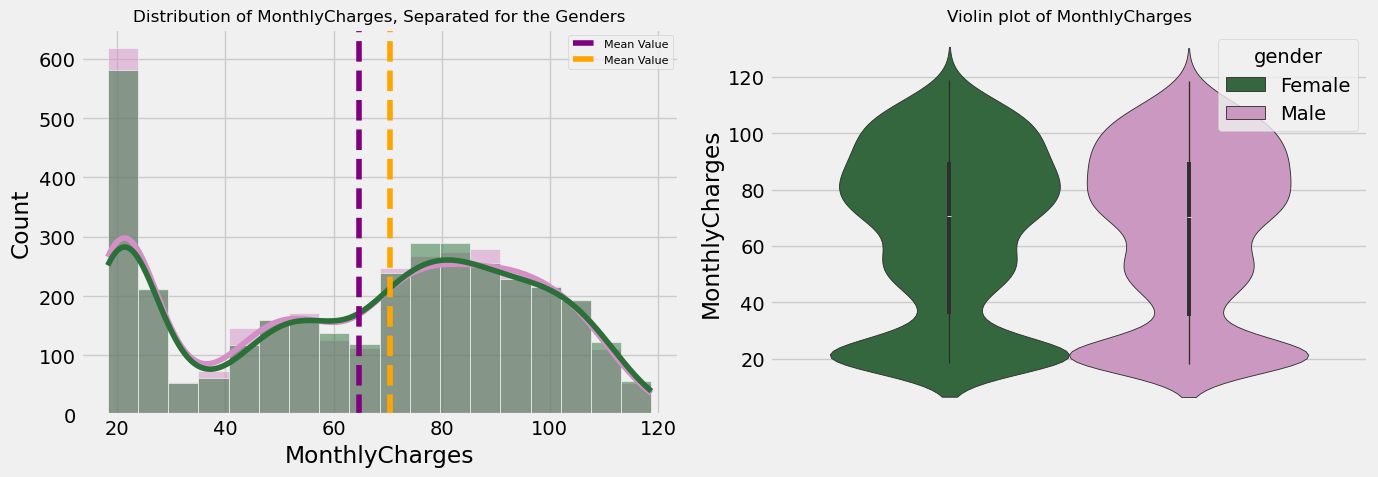

In [159]:
dist_plot(df, "MonthlyCharges") 

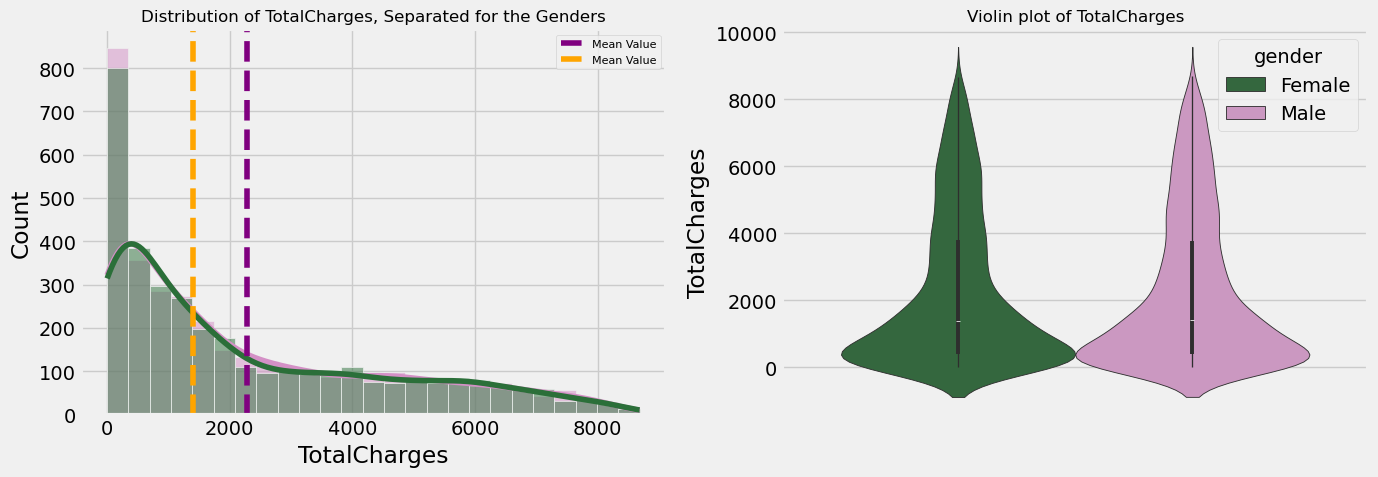

In [160]:
dist_plot(df, "TotalCharges") 

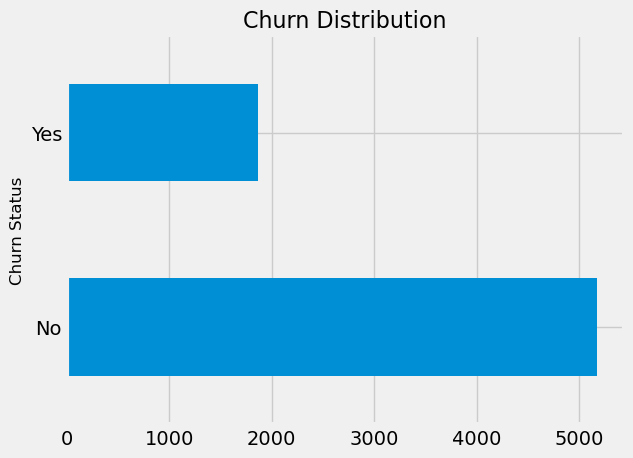

In [161]:
df['Churn'].value_counts().plot(kind='barh')
plt.title("Churn Distribution",fontsize=16)
plt.ylabel("Churn Status",fontsize=12)
plt.show()

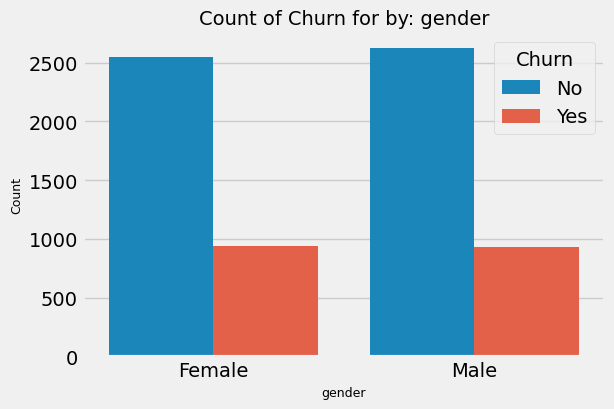

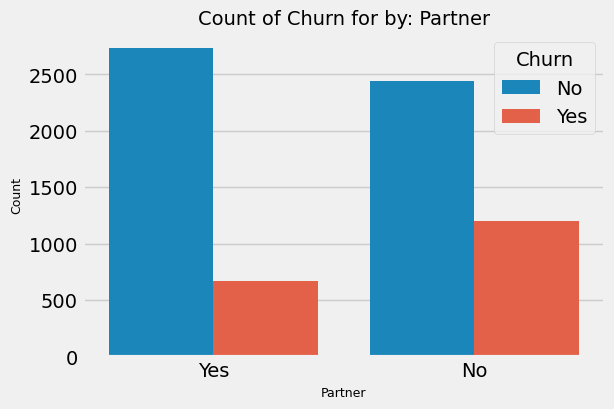

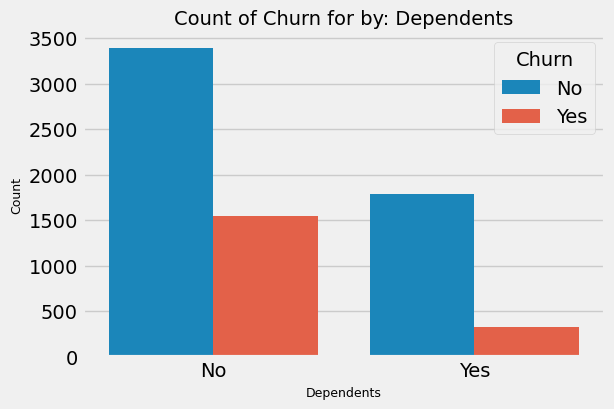

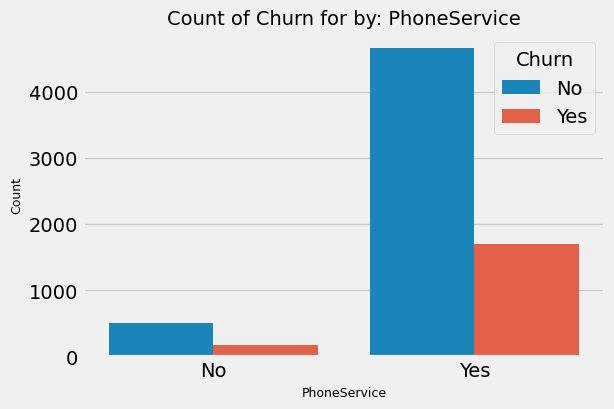

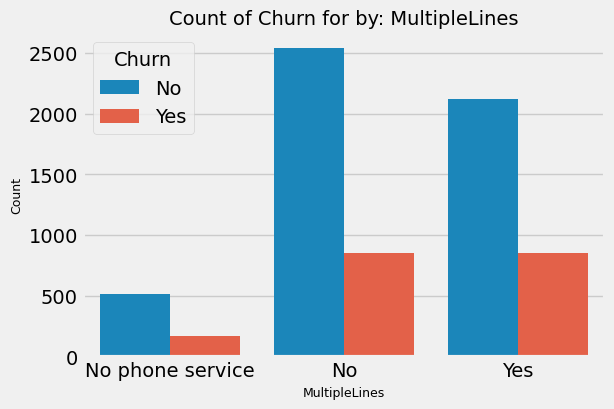

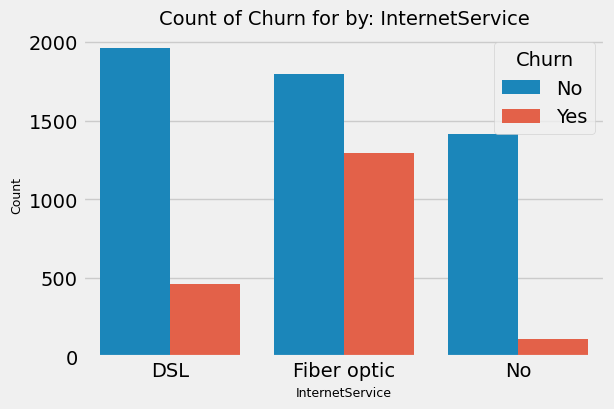

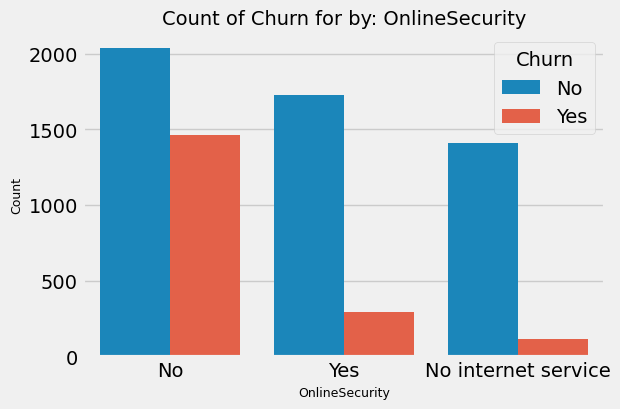

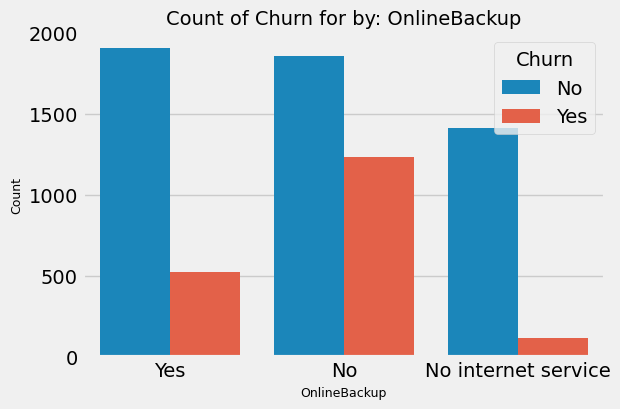

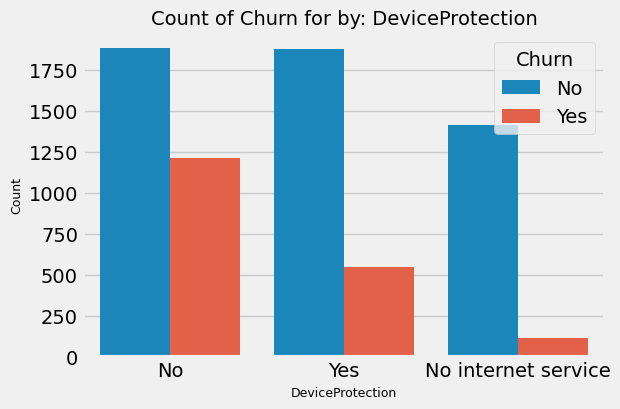

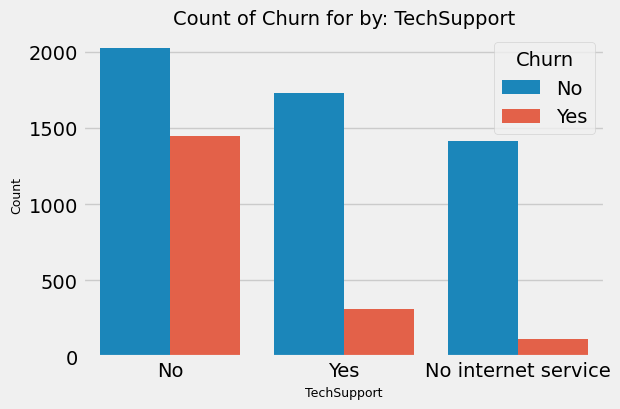

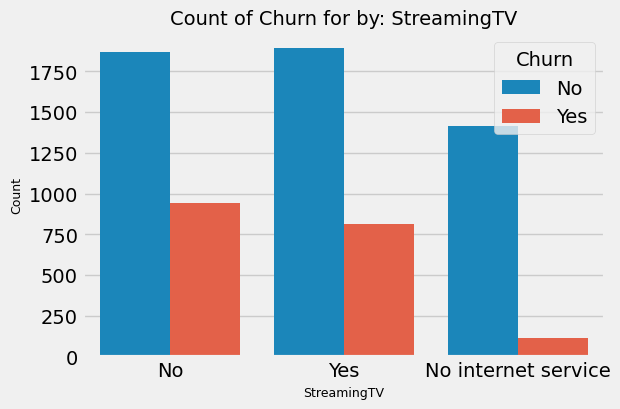

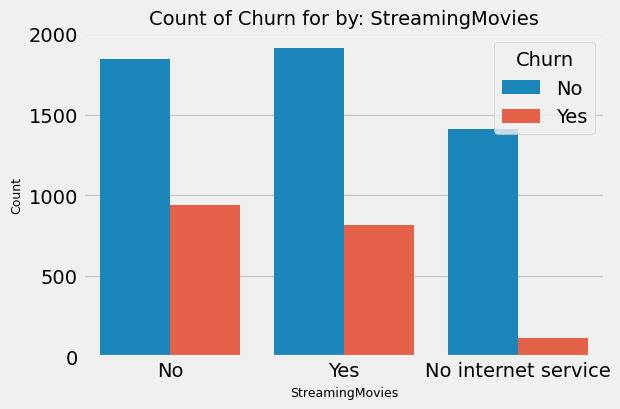

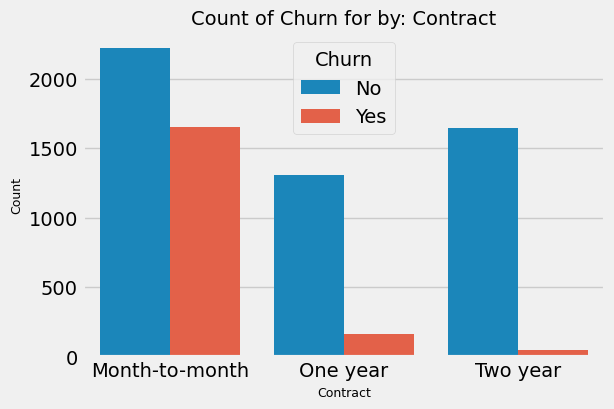

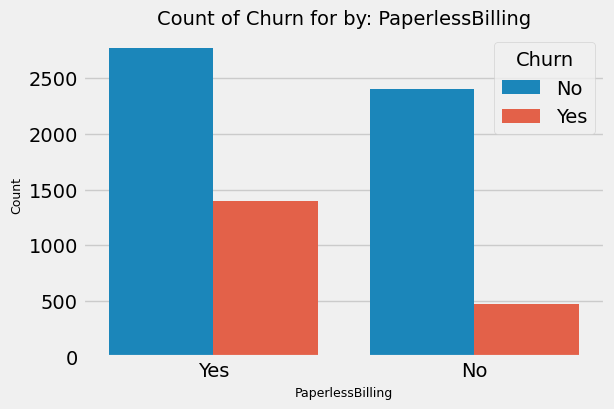

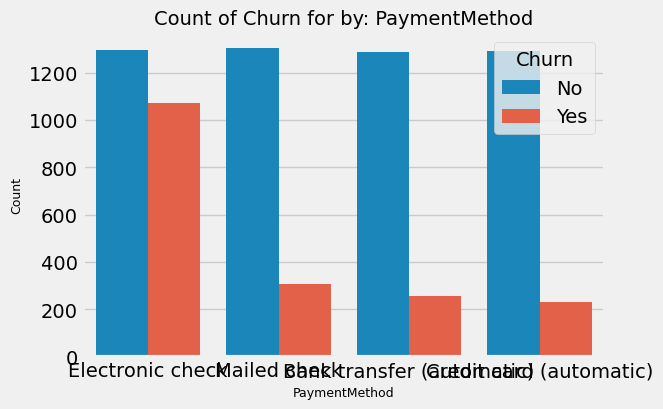

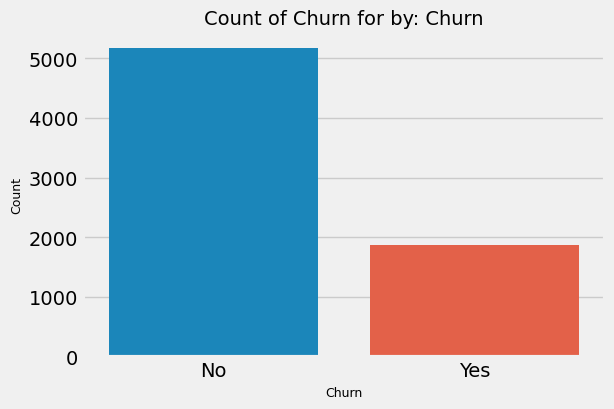

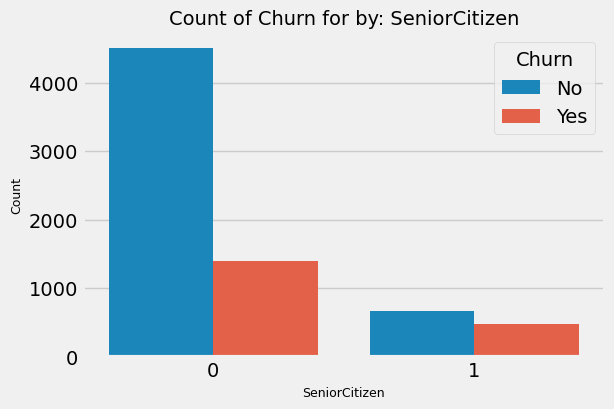

In [162]:
categorical_labels = df.select_dtypes(include='object').columns.to_list() + ['SeniorCitizen']


for col in categorical_labels:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[col],hue=df['Churn'])
    plt.title(f"Count of Churn for by: {col}",fontsize=14)
    plt.ylabel("Count",fontsize=9)
    plt.xlabel(f"{col}",fontsize=9)
    plt.show()

### Heatmap

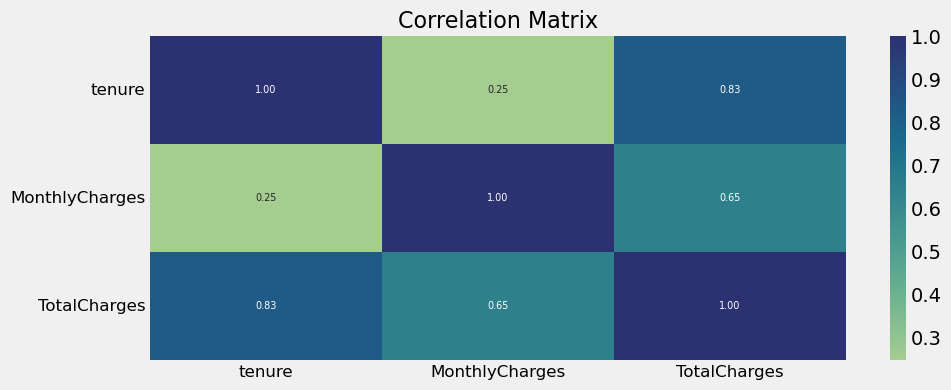

In [163]:
plt.figure(figsize=(10,4))
res = sns.heatmap(df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr(), annot=True,annot_kws={"size": 7},cmap='crest',fmt = '.2f')
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 12)
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 12)
plt.title("Correlation Matrix",fontsize=16)
plt.show()

## Label Encoding

In [164]:
df['Churn'] = df['Churn'].map({'Yes':1,"No":0})

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [165]:
# Let's label encode the rest
object_values = df.select_dtypes(include='object').columns
object_values

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [166]:
encoders = {}
for col in object_values:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

In [167]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [168]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [169]:
with open('model/encoder.pkl','wb') as e:
    pickle.dump(encoders, e)

### Scale Features

In [170]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

## Split Data

In [172]:
X = df.drop(columns=['Churn'])
y = df['Churn']

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2,random_state=42)

print(f"X_train shape: {X_train.shape}")

X_train shape: (5634, 19)


In [173]:
y_train.value_counts()

Churn
0    4138
1    1496
Name: count, dtype: int64

In [176]:
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train,y_train)


In [177]:
y_train_sm.value_counts()

Churn
0    4138
1    4138
Name: count, dtype: int64

## Create Model

In [186]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, solver='liblinear')

}


hyperparameters = {
    "Random Forest" :{
        "n_estimators": [50,100, 200],
        "max_depth": [5, 10, None],
    },
    "XGBoost": {
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 7],
    },
    "Logistic Regression":{
        "penalty": ['l2','l1'],
        "C": [0.1],
    }    
}

In [187]:
best_model_perf = {}

for models_name, model in models.items():
    print(f"Turning {models_name}------------------------")
    grid = GridSearchCV(estimator=model, param_grid=hyperparameters[models_name],cv=5,scoring="accuracy")
    grid.fit(X_train_sm,y_train_sm)
    best_model_perf[models_name] = grid.best_estimator_
    print(f"Best Hyperparameters for {models_name} : {grid.best_params_}")
    print(f"Best Accuracy for {models_name} : {grid.best_score_: .2f}")

Turning Random Forest------------------------
Best Hyperparameters for Random Forest : {'max_depth': None, 'n_estimators': 200}
Best Accuracy for Random Forest :  0.84
Turning XGBoost------------------------
Best Hyperparameters for XGBoost : {'learning_rate': 0.2, 'max_depth': 7}
Best Accuracy for XGBoost :  0.82
Turning Logistic Regression------------------------
Best Hyperparameters for Logistic Regression : {'C': 0.1, 'penalty': 'l2'}
Best Accuracy for Logistic Regression :  0.77


In [188]:
best_model_perf

{'Random Forest': RandomForestClassifier(n_estimators=200, random_state=42),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.2, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=7, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, random_state=42, ...),
 'Logistic Regression': LogisticRegression(C=0.1, random_state=42, solver='liblinear')}

In [205]:
with open("model/best_model_rf.pkl", "wb") as f:
    pickle.dump(best_model_perf['Random Forest'], f)


with open("model/best_model_xgb.pkl", "wb") as f:
    pickle.dump(best_model_perf['XGBoost'], f)

#sAve the Log REgreesion with the suited hyperparameters
with open("model/best_model_log.pkl", "wb") as f:
    pickle.dump(best_model_perf['Logistic Regression'], f)

In [191]:
with open("model/scaler.pkl",'wb') as f:
    pickle.dump(scaler, f)

In [196]:
y_pred = best_model_perf['Random Forest'].predict(X_test)
y_prob = best_model_perf['Random Forest'].predict_proba(X_test)

In [197]:
print(f"Accuracy : ", accuracy_score(y_test, y_pred))
print(f"ROC - AUC Score : ", roc_auc_score(y_test, y_pred))
print(f"Classification Report : \n", classification_report(y_test, y_pred))

Accuracy :  0.7821149751596878
ROC - AUC Score :  0.7463175546285465
Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.82      0.85      1036
           1       0.58      0.67      0.62       373

    accuracy                           0.78      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.80      0.78      0.79      1409



In [198]:
print(f"Confusion Matrix : \n", confusion_matrix(y_test, y_pred))


Confusion Matrix : 
 [[852 184]
 [123 250]]


## Test Model and Functions

In [206]:
with open("model/best_model_rf.pkl",'rb') as r:
    model_rf = pickle.load(r)

with open("model/scaler.pkl",'rb') as r:
    scaler_rf = pickle.load(r)

with open("model/encoder.pkl",'rb') as r:
    encoder_rf = pickle.load(r)

In [209]:
# creae a function too make predictions

def predictor(input_data):
    input_df = pd.DataFrame([input_data])
    for col, encoder in encoder_rf.items():
        input_df[col] = encoder.transform(input_df[col])
    numericals = ['tenure', 'MonthlyCharges', 'TotalCharges']
    input_df[numericals] = scaler_rf.transform(input_df[numericals])
    predictions_rf = model_rf.predict(input_df)[0]
    probability_rf = model_rf.predict_proba(input_df)[0,1]
    return "Churn" if predictions_rf == 1 else "No Churn", probability_rf

In [217]:
example_input = {
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 1,
    'PhoneService': 'No',
    'MultipleLines': 'No phone service',
    'InternetService': 'DSL',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 29.85,
    'TotalCharges': 29.85}

prediction, prob = predictor(example_input)
print(f"Prediction: {prediction}: \nProbability of Churn : {prob *100 : .2f}%")

Prediction: No Churn: 
Probability of Churn :  25.50%
